In [ ]:
import pandas as pd

import numpy as np

In [ ]:
df_ikd = pd.read_csv('crawl_datax.csv')

In [ ]:
len(df_ikd.index)

1500

In [ ]:
df_ikd.index += 1
df_ikd.head()

,username,created_at,full_text
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...


# Casefolding

In [ ]:
df_ikd['hasil_casefolding'] = df_ikd.apply(lambda row: row['full_text'].lower(), axis=1)

In [ ]:
df_ikd.head()

,username,created_at,full_text,hasil_casefolding
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...


# Cleansing Data

In [ ]:
import re
import string

def clean_text(text):
  #menghapus Username Twitter
  text = re.sub ('@[^\s]+', ' ', text)

  #menghapus https dan http
  text = re.sub (r"(?:\@|http?\://|https?\://|www)\+", "", text)

  #menghilangkan tanda baca
  text = text.translate(str.maketrans(' ', ' ', string.punctuation))

  #mengganti karakter html dengan tanda petik
  text = re.sub('<.*?>', ' ', text)

  #mempertimbangkan huruf dan angka
  text = re.sub('[^a-zA-Z]', ' ', text)

  #mengganti line baru dengan spasi
  text = re.sub("\n", " ", text)

  #mengubah ke huruf kecil
  text = text.lower()

  #menghapus single char
  text =  re.sub(r"\b[a-zA-Z]\b", " ", text)

  #memisahkan dan menggabungkan kata
  text = ' '.join(text.split())
  return text

In [ ]:
df_ikd['hasil_clean'] = df_ikd['hasil_casefolding'].apply(clean_text)
df_ikd.head()

,username,created_at,full_text,hasil_casefolding,hasil_clean
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...


In [ ]:
def remove_repeated_characters(text):
    pattern = re.compile(r"(.)\1{2,}")  # Pola untuk mengidentifikasi huruf yang diulang minimal 3 kali
    return pattern.sub(r"\1\1", text)  # Mengganti dengan dua kali huruf yang diulang

In [ ]:
df_ikd['hasil_clean'] = df_ikd['hasil_clean'].apply(remove_repeated_characters)


In [ ]:
df_ikd.head()

,username,created_at,full_text,hasil_casefolding,hasil_clean
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...


# Tokenizing

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from nltk.tokenize import word_tokenize

def text_tokenize(text) :
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

In [ ]:
df_ikd['hasil_token'] = df_ikd['hasil_clean'].apply(text_tokenize)
df_ikd.head()

,username,created_at,full_text,hasil_casefolding,hasil_clean,hasil_token
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor..."
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o..."


In [ ]:
print(type(df_ikd['hasil_token'].iloc[0]))
print(df_ikd['hasil_token'].iloc[0])


<class 'list'>
['yoi', 'disana', 'bukan', 'tempat', 'yg', 'rekomen', 'buat', 'kaburajadulu', 'mana', 'pake', 'embel', 'enak', 'bisa', 'nonton', 'timnas', 'di', 'kuwait']


In [ ]:
print(list(slang_dict.items())[:100])

[('gak', 'tidak'), ('aja', 'saja'), ('ga', 'tidak'), ('malah', 'malahan'), ('apk', 'aplikasi'), ('udah', 'sudah'), ('gk', 'tidak'), ('ribet', 'rumit'), ('kalo', 'kalau'), ('selalu', 'tetap'), ('kenapa', 'mengapa'), ('g', 'tidak'), ('eror', 'error'), ('biar', 'agar'), ('tp', 'tetapi'), ('lemot', 'lambat'), ('loading', 'memuat'), ('tdk', 'tidak'), ('utk', 'untuk'), ('pas', 'tepat'), ('tetep', 'tetap'), ('urus', 'atur'), ('jelek', 'buruk'), ('mending', 'mending'), ('instal', 'unduh'), ('bener', 'benar'), ('benerin', 'perbaiki'), ('taik', 'sampah'), ('emng', 'memang'), ('kebuka', 'terbuka'), ('bner', 'benar'), ('ilang', 'hilang'), ('parah', 'buruk'), ('kalian', 'anda sekalian'), ('full', 'penuh'), ('dateng', 'datang'), ('repot', 'susah'), ('ngurus', 'urus'), ('kali', 'sangat'), ('trus', 'selalu'), ('ganti', 'ubah'), ('makin', 'semakin'), ('gabisa', 'tidak bisa'), ('nggak', 'tidak'), ('app', 'aplikasi'), ('karna', 'karena'), ('bs', 'bisa'), ('kk', 'kartu'), ('bsa', 'bisa'), ('tau', 'tahu'),

Normalisasi


In [ ]:
kamus_slang = pd.read_csv('Kamus_baku.csv',encoding='latin-1')

In [ ]:
# Konversi DataFrame ke dictionary
slang_dict = {}
for index, row in kamus_slang.iterrows():
  # Use iloc to access elements by position
  if row.iloc[0] not in slang_dict :
    slang_dict[row.iloc[0]] = row.iloc[1]

def normalized_term(document):
  return [slang_dict[term] if term in slang_dict else term for term in document]

In [ ]:
df_ikd['hasil_normalisasi'] = df_ikd['hasil_token'].apply(normalized_term)

In [ ]:
df_ikd.head(50)

,username,created_at,full_text,hasil_casefolding,hasil_clean,hasil_token,hasil_normalisasi
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat...","[yoi, disana, bukan, tempat, yg, rekomen, buat..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor...","[amin, pls, kasung, tolong, bawa, aku, ke, kor..."
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ...","[satu, lagi, pesepak, bola, muda, kita, yang, ..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya...","[thought, hes, that, wni, kaburajadulu, ternya..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o...","[mmg, kaburajadulu, itu, bukan, buat, semua, o..."
6,sogosagi,Thu Apr 10 05:59:13 +0000 2025,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,sudah siap kaburajadulu kak macha karena cocok...,"[sudah, siap, kaburajadulu, kak, macha, karena...","[sudah, siap, kaburajadulu, kak, macha, karena..."
7,darlingRui17,Thu Apr 10 05:48:17 +0000 2025,@baroquebandit Mari kita #KaburAjaDulu,@baroquebandit mari kita #kaburajadulu,mari kita kaburajadulu,"[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]"
8,En_nan110,Thu Apr 10 05:31:02 +0000 2025,Disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,"[disini, jadi, ngerasa, kalau, udah, kebanyaka...","[disini, jadi, ngerasa, kalau, sudah, banyak, ..."
9,nctsunzen,Thu Apr 10 05:12:12 +0000 2025,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,"[trs, dia, bilng, ke, ak, jangan, mau, kerja, ...","[trs, dia, bilng, ke, saya, jangan, ingin, ker..."
10,septianiii,Thu Apr 10 05:09:32 +0000 2025,@atikaluthfiy Dia itu aktivis #kaburajadulu,@atikaluthfiy dia itu aktivis #kaburajadulu,dia itu aktivis kaburajadulu,"[dia, itu, aktivis, kaburajadulu]","[dia, itu, aktivis, kaburajadulu]"


# Filtering

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

# Menghapus kata "kenapa" dan "apa" dari daftar stopwords
stopwords = [word for word in stopwords if word not in ['kenapa', 'apa','mengapa','guna']]

# Menambahkan kata-kata tambahan ke dalam daftar stopwords
additional_stopwords = [
    'aplikasi','nya','di','ny','disdukcapil','sih','kok','koq','dan','ke','ini','saja','apk','ktp',
    'barcode','itu','lah','la','qr','kecamatan','aceh','capil','indosat','telkomsel','ikd',
    'dn','dan','ke','servernya','ikan','yaa','yg','yng','loh','lah','toh',
    'min','admin','jaring','si','sih','dong','ni','satu','jeruklegi','kab',
    'cilacap','aj','yah','file','kan','serba','coy','cok','cuk','to',
    'nik','kantor','kelurahan','x','d','a','duk','capil','yang','wifi','saya',
    'lagi','kalau','klo','untuk','atau','kalian','anda sekalian','kamu sekalian',
    'kalian','dalam','lagi','hanya','identitas','kependudukan','data','buka aplikasi'
]

stopwords.extend(additional_stopwords)

# Menampilkan daftar stopwords akhir
print(stopwords)


['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'seb

In [ ]:
def text_stopword(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens


In [ ]:
df_ikd['hasil_stops'] = df_ikd['hasil_normalisasi'].apply(text_stopword)
df_ikd.head()

,userName,score,at,content,hasil_casefolding,hasil_clean,hasil_token,hasil_normalisasi,hasil_stops
1,muhamad hasan,5,2024-06-15 16:25:58,Bagus,bagus,bagus,[bagus],[bagus],[bagus]
2,Samsul Saje,2,2024-06-15 15:46:47,Kenapa aplikasi identitas kepwndusukan sy tida...,kenapa aplikasi identitas kepwndusukan sy tida...,kenapa aplikasi identitas kepwndusukan sy tida...,"[kenapa, aplikasi, identitas, kepwndusukan, sy...","[mengapa, aplikasi, identitas, kependudukan, s...","[mengapa, buka]"
3,Sopian N.,1,2024-06-15 15:40:32,"Selalu terjadi, aplikasi yang dikeluarkan peme...","selalu terjadi, aplikasi yang dikeluarkan peme...",selalu terjadi aplikasi yang dikeluarkan pemer...,"[selalu, terjadi, aplikasi, yang, dikeluarkan,...","[tetap, terjadi, aplikasi, yang, dikeluarkan, ...","[tetap, terjadi, dikeluarkan, pemerintah, masa..."
4,Matruhimat57 Ruhimat,4,2024-06-15 13:21:23,Sy dah terdaftar tapi di ganti HP datanya tida...,sy dah terdaftar tapi di ganti hp datanya tida...,sy dah terdaftar tapi di ganti hp datanya tida...,"[sy, dah, terdaftar, tapi, di, ganti, hp, data...","[saya, sudah, terdaftar, tapi, di, ubah, ponse...","[terdaftar, ubah, ponsel, datanya, mengapa, un..."
5,Putra Hardiansyah,1,2024-06-15 10:21:14,"Gk bisa di Install njir apa coba, Install apli...","gk bisa di install njir apa coba, install apli...",gk bisa di install njir apa coba install aplik...,"[gk, bisa, di, install, njir, apa, coba, insta...","[tidak, bisa, di, unduh, gila, apa, coba, undu...","[unduh, gila, apa, coba, unduh, padahal, dibut..."


# Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [ ]:
def teks_stemming(tokens):
    # Handle potential float values by converting them to strings
    hasil = [stemmer.stem(str(token)) for token in tokens]
    return hasil

In [ ]:
df_ikd['hasil_stemming'] = df_ikd['hasil_stops'].apply(teks_stemming)

In [ ]:
df_ikd.head(10)

,userName,score,at,content,hasil_casefolding,hasil_clean,hasil_token,hasil_normalisasi,hasil_stops,hasil_stemming
1,muhamad hasan,5,2024-06-15 16:25:58,Bagus,bagus,bagus,[bagus],[bagus],[bagus],[bagus]
2,Samsul Saje,2,2024-06-15 15:46:47,Kenapa aplikasi identitas kepwndusukan sy tida...,kenapa aplikasi identitas kepwndusukan sy tida...,kenapa aplikasi identitas kepwndusukan sy tida...,"[kenapa, aplikasi, identitas, kepwndusukan, sy...","[mengapa, aplikasi, identitas, kependudukan, s...","[mengapa, buka]","[mengapa, buka]"
3,Sopian N.,1,2024-06-15 15:40:32,"Selalu terjadi, aplikasi yang dikeluarkan peme...","selalu terjadi, aplikasi yang dikeluarkan peme...",selalu terjadi aplikasi yang dikeluarkan pemer...,"[selalu, terjadi, aplikasi, yang, dikeluarkan,...","[tetap, terjadi, aplikasi, yang, dikeluarkan, ...","[tetap, terjadi, dikeluarkan, pemerintah, masa...","[tetap, jadi, keluar, perintah, masalah, regis..."
4,Matruhimat57 Ruhimat,4,2024-06-15 13:21:23,Sy dah terdaftar tapi di ganti HP datanya tida...,sy dah terdaftar tapi di ganti hp datanya tida...,sy dah terdaftar tapi di ganti hp datanya tida...,"[sy, dah, terdaftar, tapi, di, ganti, hp, data...","[saya, sudah, terdaftar, tapi, di, ubah, ponse...","[terdaftar, ubah, ponsel, datanya, mengapa, un...","[daftar, ubah, ponsel, data, mengapa, unduh, p..."
5,Putra Hardiansyah,1,2024-06-15 10:21:14,"Gk bisa di Install njir apa coba, Install apli...","gk bisa di install njir apa coba, install apli...",gk bisa di install njir apa coba install aplik...,"[gk, bisa, di, install, njir, apa, coba, insta...","[tidak, bisa, di, unduh, gila, apa, coba, undu...","[unduh, gila, apa, coba, unduh, padahal, dibut...","[unduh, gila, apa, coba, unduh, padahal, dibut..."
6,bang ossas,1,2024-06-15 09:52:25,APLIKASI PEMERINTAH GAK ADA YANG BENER!!!!!,aplikasi pemerintah gak ada yang bener!!!!!,aplikasi pemerintah gak ada yang bener,"[aplikasi, pemerintah, gak, ada, yang, bener]","[aplikasi, pemerintah, tidak, ada, yang, benar]","[pemerintah, benar]","[perintah, benar]"
7,Muna Ukhtufiatul Fauziah,3,2024-06-15 07:09:46,Gaada fitur lupa pin,gaada fitur lupa pin,gaada fitur lupa pin,"[gaada, fitur, lupa, pin]","[tidak, fitur, lupa, pin]","[fitur, lupa, pin]","[fitur, lupa, pin]"
8,Fatmawati Triwulanhari,5,2024-06-15 06:27:22,"Bermanfaat sekali ,dan digunakan dimanapun berapa","bermanfaat sekali ,dan digunakan dimanapun berapa",bermanfaat sekali dan digunakan dimanapun berapa,"[bermanfaat, sekali, dan, digunakan, dimanapun...","[bermanfaat, sekali, dan, digunakan, dimanapun...","[bermanfaat, sekali, digunakan, dimanapun, ber...","[manfaat, sekali, guna, mana, berapa]"
9,Edi Widarto,2,2024-06-15 05:48:06,Susah masuk dan kalo pin salah susah gantinya,susah masuk dan kalo pin salah susah gantinya,susah masuk dan kalo pin salah susah gantinya,"[susah, masuk, dan, kalo, pin, salah, susah, g...","[susah, masuk, dan, kalau, pin, salah, susah, ...","[susah, masuk, pin, salah, susah, gantinya]","[susah, masuk, pin, salah, susah, ganti]"
10,lusi kusnaeni,2,2024-06-15 05:12:36,"Tidak ads fitur untuk ubah pin , padahal pin y...","tidak ads fitur untuk ubah pin , padahal pin y...",tidak ads fitur untuk ubah pin padahal pin ya...,"[tidak, ads, fitur, untuk, ubah, pin, padahal,...","[tidak, ada, fitur, untuk, ubah, pin, padahal,...","[fitur, ubah, pin, padahal, pin, dimasukkan, b...","[fitur, ubah, pin, padahal, pin, masuk, benar,..."


# Wordcloud

In [ ]:
!pip install wordcloud matplotlib


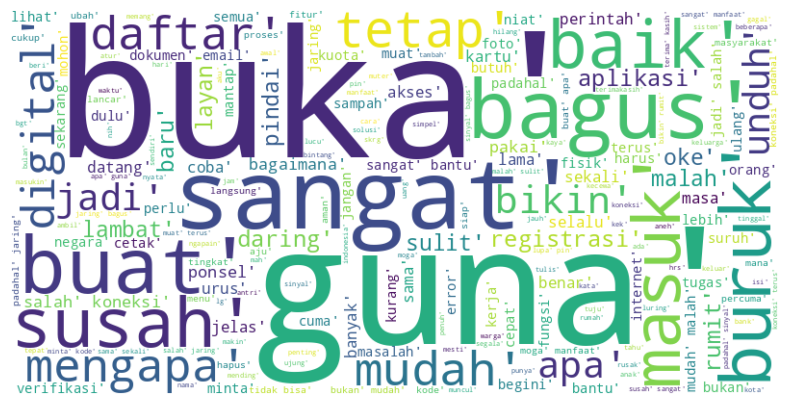

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan dataframe df_ikd dan kolom 'hasil_stemming' ada
# Gabungkan semua teks menjadi satu string besar
try:
    text = " ".join(df_ikd['hasil_stemming'].astype(str))  # Pastikan semua teks dalam format string
except Exception as e:
    print(f"Error: {e}")

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hapus axis
plt.show()


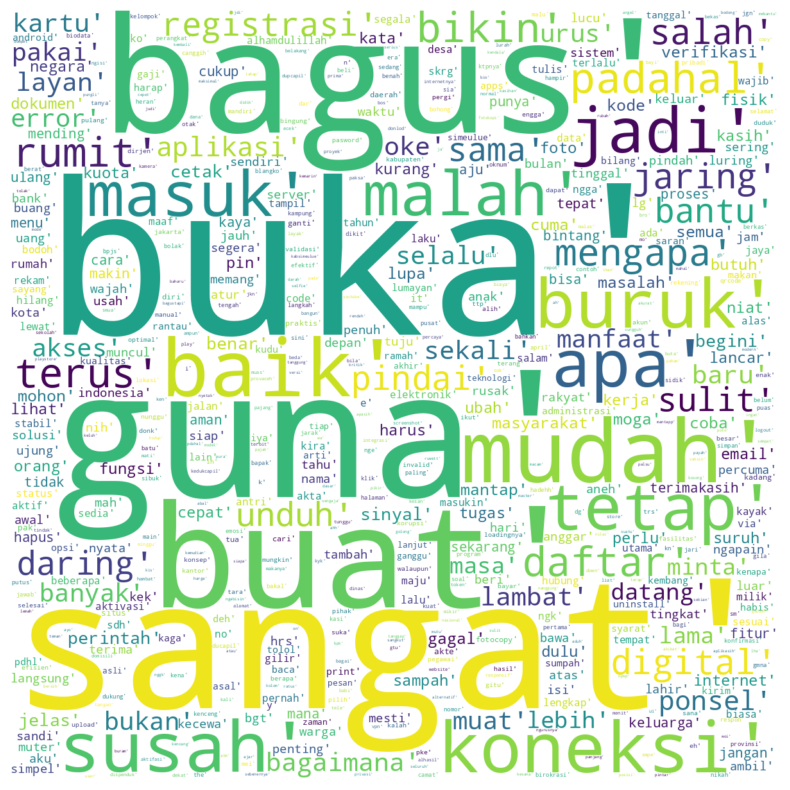

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan dataframe df_ikd dan kolom 'hasil_stemming' ada
# Gabungkan semua teks menjadi satu string besar
try:
    text = " ".join(df_ikd['hasil_stemming'].astype(str))  # Pastikan semua teks dalam format string
except Exception as e:
    print(f"Error: {e}")

# Buat WordCloud dengan kata terbesar di tengah dan berbentuk lingkaran
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    collocations=False,
    prefer_horizontal=1.0,
    contour_color='black',
    contour_width=1,
    max_words=2000,
    colormap='viridis',
    mode='RGBA',
    scale=1.5
).generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hapus axis
plt.show()


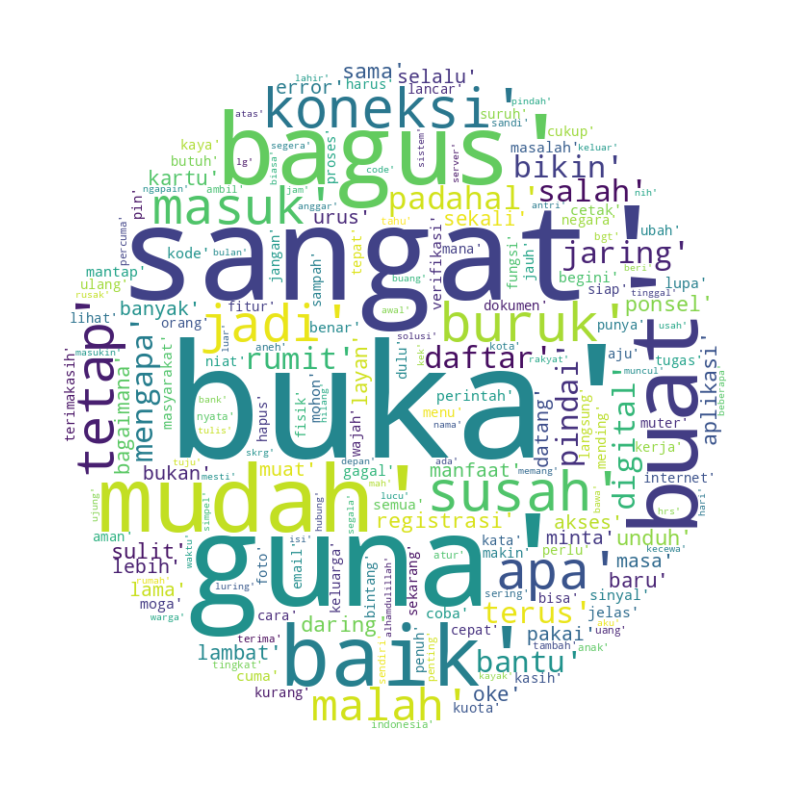

In [ ]:
try:
    text = " ".join(df_ikd['hasil_stemming'].astype(str))  # Pastikan semua teks dalam format string
except Exception as e:
    print(f"Error: {e}")

# Membuat mask berbentuk lingkaran
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 350 ** 2
mask = 255 * mask.astype(int)

# Buat WordCloud dengan mask berbentuk lingkaran
wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    stopwords=stopwords,
    mask=mask,
    collocations=False
)

wc.generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

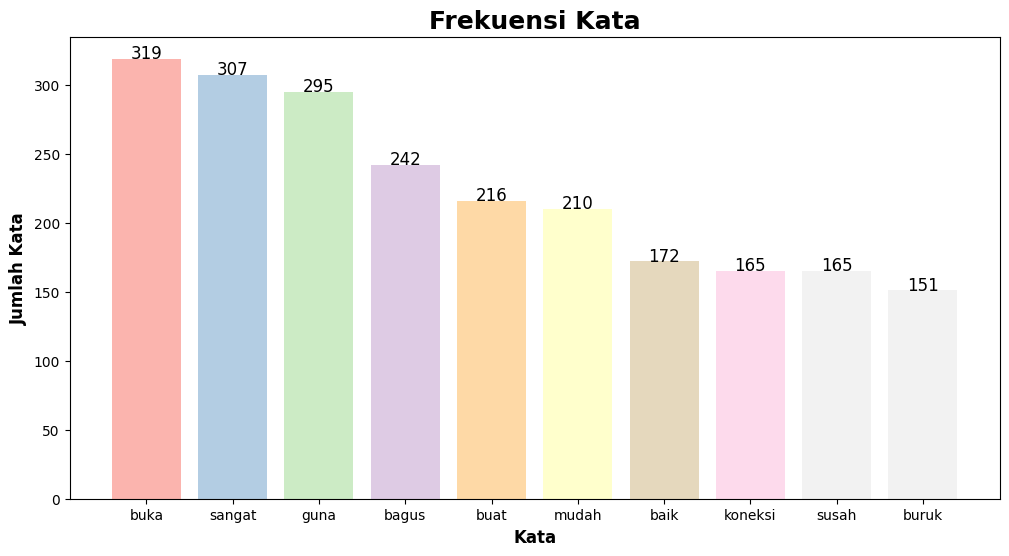

In [ ]:
from collections import Counter

text = " ".join([" ".join(lst) for lst in df_ikd['hasil_stemming']])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna dengan warna yang lebih lembut
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=0)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 0.3, str(num), fontsize=12, color='black', ha='center')

plt.show()

# Labelling

In [ ]:
import csv

def load_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)  # Lewati header
        for row in reader:
            if len(row) < 2:
                print(f"Skipping incomplete row: {row}")
                continue
            try:
                lexicon[row[0]] = int(row[1])
            except ValueError:
                print(f"Skipping row with non-integer value: {row}")
    return lexicon

# Memuat positive lexicon
lexicon_positive = load_lexicon('positives.csv')

# Memuat negative lexicon
lexicon_negative = load_lexicon('negatives.csv')

Skipping incomplete row: []


In [ ]:
def sentiment_analysis(text):
  score = 0
  for word in text:
    if(word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if(word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity=''
  if(score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'
  return score, polarity

In [ ]:
result = df_ikd['hasil_stemming'].apply(sentiment_analysis)
result = list(zip(*result))
df_ikd['polarity_scores'] = result[0]
df_ikd['polarity'] = result[1]
print(df_ikd['polarity'].value_counts())

polarity
negative    1258
positive     556
neutral      186
Name: count, dtype: int64


In [ ]:
df_ikd.head()

,userName,score,at,content,hasil_casefolding,hasil_clean,hasil_token,hasil_normalisasi,hasil_stops,hasil_stemming,polarity_scores,polarity
1,muhamad hasan,5,2024-06-15 16:25:58,Bagus,bagus,bagus,[bagus],[bagus],[bagus],[bagus],4,positive
2,Samsul Saje,2,2024-06-15 15:46:47,Kenapa aplikasi identitas kepwndusukan sy tida...,kenapa aplikasi identitas kepwndusukan sy tida...,kenapa aplikasi identitas kepwndusukan sy tida...,"[kenapa, aplikasi, identitas, kepwndusukan, sy...","[mengapa, aplikasi, identitas, kependudukan, s...","[mengapa, buka]","[mengapa, buka]",-1,negative
3,Sopian N.,1,2024-06-15 15:40:32,"Selalu terjadi, aplikasi yang dikeluarkan peme...","selalu terjadi, aplikasi yang dikeluarkan peme...",selalu terjadi aplikasi yang dikeluarkan pemer...,"[selalu, terjadi, aplikasi, yang, dikeluarkan,...","[tetap, terjadi, aplikasi, yang, dikeluarkan, ...","[tetap, terjadi, dikeluarkan, pemerintah, masa...","[tetap, jadi, keluar, perintah, masalah, regis...",-16,negative
4,Matruhimat57 Ruhimat,4,2024-06-15 13:21:23,Sy dah terdaftar tapi di ganti HP datanya tida...,sy dah terdaftar tapi di ganti hp datanya tida...,sy dah terdaftar tapi di ganti hp datanya tida...,"[sy, dah, terdaftar, tapi, di, ganti, hp, data...","[saya, sudah, terdaftar, tapi, di, ubah, ponse...","[terdaftar, ubah, ponsel, datanya, mengapa, un...","[daftar, ubah, ponsel, data, mengapa, unduh, p...",-10,negative
5,Putra Hardiansyah,1,2024-06-15 10:21:14,"Gk bisa di Install njir apa coba, Install apli...","gk bisa di install njir apa coba, install apli...",gk bisa di install njir apa coba install aplik...,"[gk, bisa, di, install, njir, apa, coba, insta...","[tidak, bisa, di, unduh, gila, apa, coba, undu...","[unduh, gila, apa, coba, unduh, padahal, dibut...","[unduh, gila, apa, coba, unduh, padahal, dibut...",-12,negative
6,bang ossas,1,2024-06-15 09:52:25,APLIKASI PEMERINTAH GAK ADA YANG BENER!!!!!,aplikasi pemerintah gak ada yang bener!!!!!,aplikasi pemerintah gak ada yang bener,"[aplikasi, pemerintah, gak, ada, yang, bener]","[aplikasi, pemerintah, tidak, ada, yang, benar]","[pemerintah, benar]","[perintah, benar]",-2,negative
7,Muna Ukhtufiatul Fauziah,3,2024-06-15 07:09:46,Gaada fitur lupa pin,gaada fitur lupa pin,gaada fitur lupa pin,"[gaada, fitur, lupa, pin]","[tidak, fitur, lupa, pin]","[fitur, lupa, pin]","[fitur, lupa, pin]",-2,negative
8,Fatmawati Triwulanhari,5,2024-06-15 06:27:22,"Bermanfaat sekali ,dan digunakan dimanapun berapa","bermanfaat sekali ,dan digunakan dimanapun berapa",bermanfaat sekali dan digunakan dimanapun berapa,"[bermanfaat, sekali, dan, digunakan, dimanapun...","[bermanfaat, sekali, dan, digunakan, dimanapun...","[bermanfaat, sekali, digunakan, dimanapun, ber...","[manfaat, sekali, guna, mana, berapa]",4,positive
9,Edi Widarto,2,2024-06-15 05:48:06,Susah masuk dan kalo pin salah susah gantinya,susah masuk dan kalo pin salah susah gantinya,susah masuk dan kalo pin salah susah gantinya,"[susah, masuk, dan, kalo, pin, salah, susah, g...","[susah, masuk, dan, kalau, pin, salah, susah, ...","[susah, masuk, pin, salah, susah, gantinya]","[susah, masuk, pin, salah, susah, ganti]",-13,negative
10,lusi kusnaeni,2,2024-06-15 05:12:36,"Tidak ads fitur untuk ubah pin , padahal pin y...","tidak ads fitur untuk ubah pin , padahal pin y...",tidak ads fitur untuk ubah pin padahal pin ya...,"[tidak, ads, fitur, untuk, ubah, pin, padahal,...","[tidak, ada, fitur, untuk, ubah, pin, padahal,...","[fitur, ubah, pin, padahal, pin, dimasukkan, b...","[fitur, ubah, pin, padahal, pin, masuk, benar,...",-9,negative


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

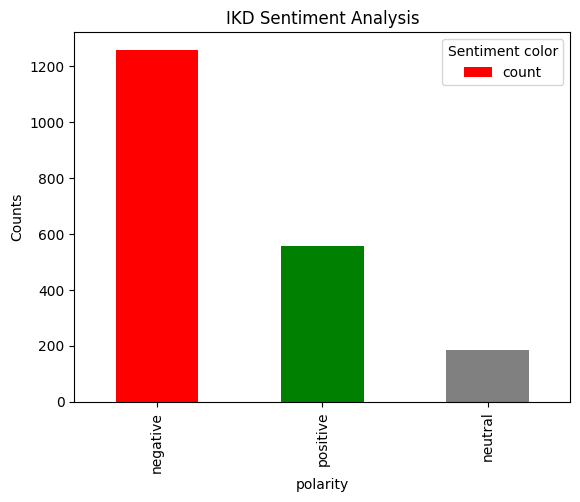

In [ ]:
fig, ax = plt.subplots()

plt.title('IKD Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('Counts')
colors = ['red', 'green', 'grey']
df_ikd['polarity'].value_counts().plot(kind = 'bar', color= colors)
ax.legend(title='Sentiment color')
plt.show()

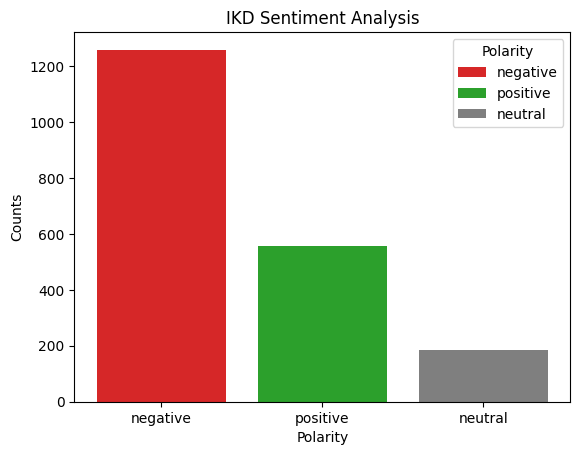

In [ ]:
import matplotlib.pyplot as plt

# Data untuk plot
polarity_counts = df_ikd['polarity'].value_counts().sort_values(ascending=False)
polarity = polarity_counts.index
counts = polarity_counts.values
bar_labels = polarity.astype(str)
bar_colors = ['tab:red', 'tab:green', 'tab:gray']  # Sesuaikan warna dengan kebutuhan

# Membuat plot
fig, ax = plt.subplots()

# Membuat bar chart
ax.bar(polarity, counts, label=bar_labels, color=bar_colors)

# Menambahkan label dan judul
ax.set_ylabel('Counts')
ax.set_xlabel('Polarity')
ax.set_title('IKD Sentiment Analysis')
ax.legend(title='Polarity')

# Menampilkan plot
plt.show()


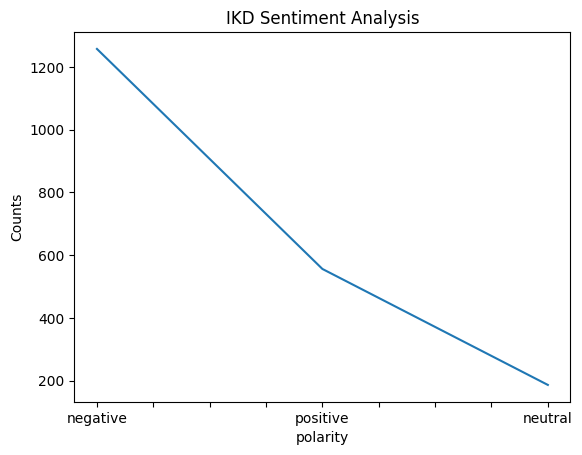

In [ ]:
plt.title('IKD Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('Counts')
df_ikd['polarity'].value_counts().plot(kind = 'line')
plt.show()

Text(0.5, 1.0, 'Sentiment Polarity on IKD Review \n (total = 2000 review)')

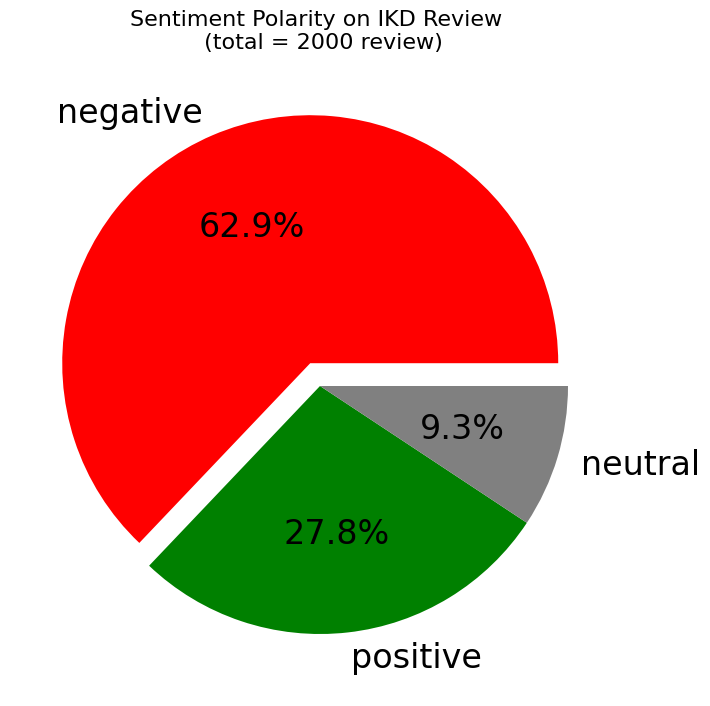

In [ ]:
fig, ax = plt.subplots(figsize = (8,10))
sizes = [count for count in df_ikd['polarity'].value_counts()]
labels = list(df_ikd['polarity'].value_counts().index)
explode = (0.1, 0, 0)
colors = ['red', 'green', 'grey']  # Hijau untuk positif, merah untuk negatif, abu-abu untuk netral
ax.pie(x= sizes, labels = labels, autopct = '%1.1f%%', colors = colors, explode = explode, textprops={'fontsize': 24})
ax.set_title('Sentiment Polarity on IKD Review \n (total = 2000 review)', fontsize = 16, pad = 20)

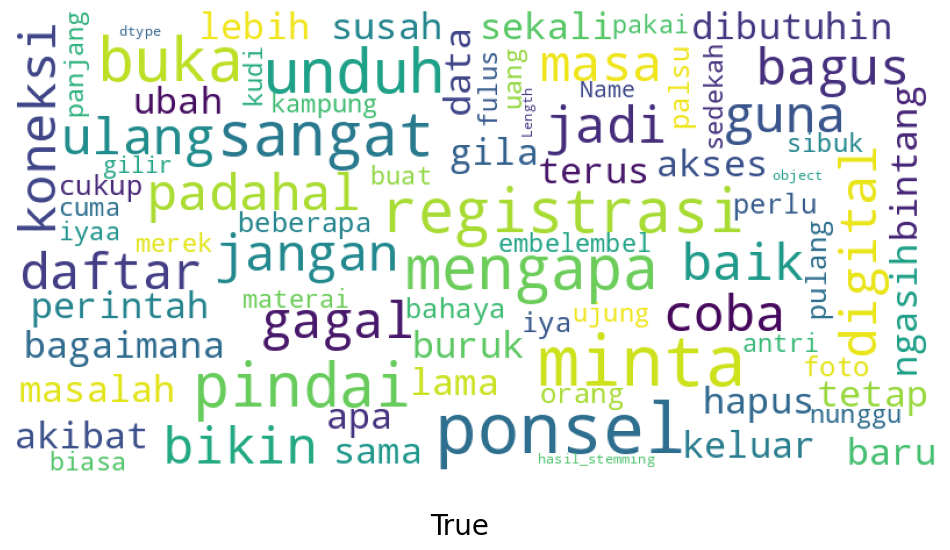

In [ ]:
from wordcloud import WordCloud

def wordcloud(data,title = True):
  wordcloud = WordCloud(
      background_color='white',
      max_words=250,
      max_font_size=30,
      scale=2,
      random_state=5
  ).generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  if title:
      fig.suptitle(title, fontsize=20)
      fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()

wordcloud(df_ikd['hasil_stemming'])

In [ ]:
def word_with_sentiment(text):
  positive_words=[]
  negative_words=[]
  for word in text:
    score_pos = 0
    score_neg = 0
    if(word in lexicon_positive):
      score_pos = lexicon_positive[word]
    if(word in lexicon_negative):
      score_neg = lexicon_negative[word]

    if(score_pos + score_neg > 0):
      positive_words.append(word)
    elif(score_pos + score_neg < 0):
      negative_words.append(word)


  return positive_words, negative_words

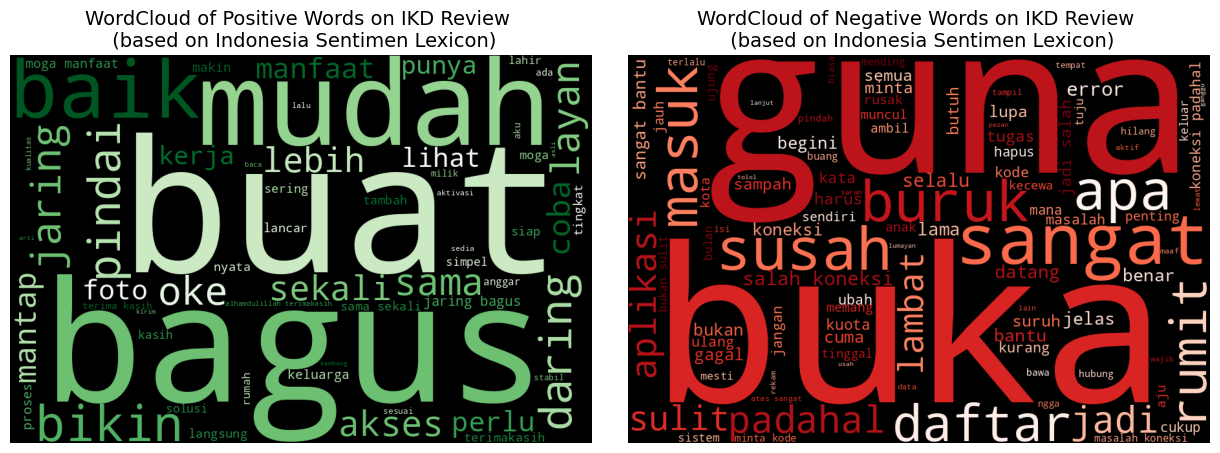

In [ ]:
sentimen_words= df_ikd['hasil_stemming'].apply(word_with_sentiment)
sentimen_words = list(zip(*sentimen_words))
positive_words = sentimen_words[0]
negative_words = sentimen_words[1]

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
list_word_positive = ''
for row_word in positive_words:
  for word in row_word:
    list_word_positive += ' ' + (word)
wordcloud_positive = WordCloud(width=900, height=600, background_color='black', colormap = 'Greens', min_font_size=10).generate(list_word_positive)
ax[0].imshow(wordcloud_positive)
ax[0].grid(False)
ax[0].set_title('WordCloud of Positive Words on IKD Review \n (based on Indonesia Sentimen Lexicon)', fontsize=14)
fig.tight_layout(pad=0)
ax[0].axis('off')

list_word_negative = ''
for row_word in negative_words:
  for word in row_word:
    list_word_negative += ' ' + (word)
wordcloud_negative = WordCloud(width=900, height=600, background_color='black', colormap = 'Reds', min_font_size=10).generate(list_word_negative)
ax[1].imshow(wordcloud_negative)
ax[1].grid(False)
ax[1].set_title('WordCloud of Negative Words on IKD Review \n (based on Indonesia Sentimen Lexicon)', fontsize=14)
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

# Top 10 Positive and Negative Word

In [ ]:
pd.set_option('display.max_colwidth', 1000)
# positive_word = df_ikd[(df_ikd['polarity'] == 'positive') & (df_ikd['score'] == 5)]
positive_word = df_ikd[df_ikd['polarity'] == 'positive']
positive_word = positive_word[['hasil_stemming','polarity_scores','polarity']].sort_values(by = 'polarity_scores', ascending=False).reset_index(drop=True)
positive_word.index += 1
positive_word[0:10]

,hasil_stemming,polarity_scores,polarity
1,"[buat, digital, beri, mudah, mudah, mudah, sama, sekali, pergi, dulu, pindai, kode, verifikasi, validasi, baik, ikan, alternatif, pergi, lebih, mudah, proses, terimakasih]",17,positive
2,"[mengapa, cuma, kota, bekas, layan, buka, konfirmasi, kota, bekas, layan, situs, daring, sama, guna, buat, perlu, penting, desak, tingkat, layan, bila, memang, mudah, masyarakat, terimakasih]",17,positive
3,"[masa, tara, buat, baik, benar, koneksi, coba, kapan, coba, terus, buat, coba, buat, guna, uang, negara, bos, manfaat, penting, maju, sama, seluruh, rakyat, indonesia]",16,positive
4,"[tuju, mungkin, baik, pribadi, kendala, proses, pindai, qrcode, mengapa, sedia, waktu, antri, kantor, instasi, kait, desadisdukcapil, sita, waktu, mgkn, baik, proses, ganti, tempel, k, ponsel, mode, nfc, verifikasi, sama, kalaupun, sama, proses, tetap, lanjut]",15,positive
5,"[layan, ramah, digital, mudah, jaya]",14,positive
6,"[mudah, efisien, layan, ramah]",14,positive
7,"[hahaha, niat, unduh, perlu, k, eh, nyata, scanner, kasih, sama, tugas, sama, donk, tahu, gitu, atur, langsung]",13,positive
8,"[layan, bagus, mantap]",12,positive
9,"[mohon, pakai, liat, kek, negara, maju, baik, sulit percaya, mesti, nunggu, muat, minta, lebih, oke, oke, lebih, baik, digitalisasi, buat, lebih, mudah, akses, jangan, cuma, gimmick, liat, maju, sekian]",12,positive
10,"[buat, nge, gaji, pegawai, kerja, duduk, bisaa, gilir, beli, server, bagus, buat, bikin, kaga, pegawai, makan, duid, haram, susah, rakyat]",11,positive


In [ ]:
pd.set_option('display.max_colwidth', 1000)
negative_word = df_ikd[df_ikd['polarity'] == 'negative']
negative_word = negative_word[['hasil_stemming','polarity_scores','polarity']].sort_values(by = 'polarity_scores', ascending=False).reset_index(drop=True)
negative_word.index += 1
negative_word[0:10]

,hasil_stemming,polarity_scores,polarity
1,"[mengapa, buka]",-1,negative
2,"[mana, pak]",-1,negative
3,"[selamat, malam, mohon, masalah, loging, buka, mohon, beri, info, terima, kasih]",-1,negative
4,"[dokumen, cetak, kata, orang, sekarang, cetak, mandiridan, semua, keluh, diapplikasi, respons]",-1,negative
5,"[kembang, datany, cuma, kis, sim, buku, nikah, kartu, vaksin, npwp, datany]",-1,negative
6,[lumayan],-1,negative
7,"[siapa, lolosin, buat, nasional, kgak, guna, kntol]",-1,negative
8,"[antri, lama, mati, lampu]",-1,negative
9,"[le, buka, y]",-1,negative
10,"[buruk, anggar, besar, bikin, apps, tidak bisa, malu, goblokk]",-1,negative
